In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import files
uploaded = files.upload()

data=pd.read_csv('data1.csv')
data.head(5)


Saving data1.csv to data1.csv


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
str=pd.get_dummies(data['street'],drop_first=True)

In [ ]:
str

,10 W Etruria St,100 20th Ave E,100 24th Ave E,100 Mt Si Pl NW,1000 Mountain View Blvd SE,10000-10026 S 100th St,10005 16th Ave S,10009 SE 247th Pl,1001 SW 102nd St,1001 Whitman Ct NE,10010 37th Ave SW,10010 44th Ave SW,10012 SE 244th Ct,1002 Pike St NE,10020 18th Ave SW,10022 19th Ave SW,10022 NE 110th St,10025-10037 31st Ave SW,10026 61st Ave S,1003 SW 307th St,10030 44th Ave SW,10037 Interlake Ave N,10041 64th Ave S,10050 11th Ave NW,10050 19th Ave SW,1006 N 5th St,1006 NE Ravenna Blvd,1006 S 286th Pl,10060 SW Dock St,10068 NE 142nd Pl,1007 N 29th St,1009 S 229th Pl,1009-1225 N 41st Pl,10090 177th Ave NE,101-115 26th Ave,101-127 247th Ave SE,1010 274th Way SE,1010 6th St W,1010 Greenwood Blvd SW,1010 NW Inneswood Dr,...,9807 22nd Ave SW,9808 NE 204th Pl,9812 S 239th Pl,9813 NE 140th St,9817 26th Ave SW,9824 NE 13th St,9827 47th Ave SW,9828 159th Pl NE,9842 Vineyard Crest,9852 20th Ave SW,9853 Arrowsmith Ave S,9854 25th Ave SW,9881 244th Pl NE,99 17th Ave,9900 SW Quartermaster Dr,9908 S 210th Pl,9921 227th Way NE,9927 174th Ave SE,9930 NE 197th St,9954 227th Way NE,9957 Rainier Ave S,996 SE 12th St,Adair Creek Trail,Bennett Ave SE,Brooktrails Trail 14,Burke-Gilman Trail,Cedar to Green River Trail,East Lake Sammamish Trail,Eastridge Drive Promenade,Evergreen Way SE,Indian Trail,Nuthatch Trail,SE 170th Pl,SE 21st Ct,Schmitz Park to Alki Trail,Shangri-La Way NW,Sunrise Loop Trail,Tolt Pipeline Trail,Trossachs Blvd SE,Valley View Trail
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4597,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4598,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cit=pd.get_dummies(data['city'],drop_first=True)

In [ ]:
cit

,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,Duvall,Enumclaw,Fall City,Federal Way,Inglewood-Finn Hill,Issaquah,Kenmore,Kent,Kirkland,Lake Forest Park,Maple Valley,Medina,Mercer Island,Milton,Newcastle,Normandy Park,North Bend,Pacific,Preston,Ravensdale,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4596,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4597,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4598,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
sta=pd.get_dummies(data['statezip'],drop_first=True)

In [ ]:
sta

,WA 98002,WA 98003,WA 98004,WA 98005,WA 98006,WA 98007,WA 98008,WA 98010,WA 98011,WA 98014,WA 98019,WA 98022,WA 98023,WA 98024,WA 98027,WA 98028,WA 98029,WA 98030,WA 98031,WA 98032,WA 98033,WA 98034,WA 98038,WA 98039,WA 98040,WA 98042,WA 98045,WA 98047,WA 98050,WA 98051,WA 98052,WA 98053,WA 98055,WA 98056,WA 98057,WA 98058,WA 98059,WA 98065,WA 98068,WA 98070,WA 98072,WA 98074,WA 98075,WA 98077,WA 98092,WA 98102,WA 98103,WA 98105,WA 98106,WA 98107,WA 98108,WA 98109,WA 98112,WA 98115,WA 98116,WA 98117,WA 98118,WA 98119,WA 98122,WA 98125,WA 98126,WA 98133,WA 98136,WA 98144,WA 98146,WA 98148,WA 98155,WA 98166,WA 98168,WA 98177,WA 98178,WA 98188,WA 98198,WA 98199,WA 98288,WA 98354
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4596,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4597,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4598,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
cou=pd.get_dummies(data['country'],drop_first=True)

In [ ]:
cou

""
0
1
2
3
4
...
4595
4596
4597
4598


In [ ]:
data.drop(['street','city','statezip','country'],axis=1,inplace=True)

In [ ]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [ ]:
da=pd.concat([data,str,cit,sta,cou],axis=1)

In [ ]:
da.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,10 W Etruria St,100 20th Ave E,100 24th Ave E,100 Mt Si Pl NW,1000 Mountain View Blvd SE,10000-10026 S 100th St,10005 16th Ave S,10009 SE 247th Pl,1001 SW 102nd St,1001 Whitman Ct NE,10010 37th Ave SW,10010 44th Ave SW,10012 SE 244th Ct,1002 Pike St NE,10020 18th Ave SW,10022 19th Ave SW,10022 NE 110th St,10025-10037 31st Ave SW,10026 61st Ave S,1003 SW 307th St,10030 44th Ave SW,10037 Interlake Ave N,10041 64th Ave S,10050 11th Ave NW,10050 19th Ave SW,1006 N 5th St,1006 NE Ravenna Blvd,...,WA 98059,WA 98065,WA 98068,WA 98070,WA 98072,WA 98074,WA 98075,WA 98077,WA 98092,WA 98102,WA 98103,WA 98105,WA 98106,WA 98107,WA 98108,WA 98109,WA 98112,WA 98115,WA 98116,WA 98117,WA 98118,WA 98119,WA 98122,WA 98125,WA 98126,WA 98133,WA 98136,WA 98144,WA 98146,WA 98148,WA 98155,WA 98166,WA 98168,WA 98177,WA 98178,WA 98188,WA 98198,WA 98199,WA 98288,WA 98354
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#feature scaling
scaler=StandardScaler()
scaler.fit(da)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
da.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,10 W Etruria St,100 20th Ave E,100 24th Ave E,100 Mt Si Pl NW,1000 Mountain View Blvd SE,10000-10026 S 100th St,10005 16th Ave S,10009 SE 247th Pl,1001 SW 102nd St,1001 Whitman Ct NE,10010 37th Ave SW,10010 44th Ave SW,10012 SE 244th Ct,1002 Pike St NE,10020 18th Ave SW,10022 19th Ave SW,10022 NE 110th St,10025-10037 31st Ave SW,10026 61st Ave S,1003 SW 307th St,10030 44th Ave SW,10037 Interlake Ave N,10041 64th Ave S,10050 11th Ave NW,10050 19th Ave SW,1006 N 5th St,1006 NE Ravenna Blvd,...,WA 98059,WA 98065,WA 98068,WA 98070,WA 98072,WA 98074,WA 98075,WA 98077,WA 98092,WA 98102,WA 98103,WA 98105,WA 98106,WA 98107,WA 98108,WA 98109,WA 98112,WA 98115,WA 98116,WA 98117,WA 98118,WA 98119,WA 98122,WA 98125,WA 98126,WA 98133,WA 98136,WA 98144,WA 98146,WA 98148,WA 98155,WA 98166,WA 98168,WA 98177,WA 98178,WA 98188,WA 98198,WA 98199,WA 98288,WA 98354
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=da.drop('price',axis=1).values

In [ ]:
x

array([[3.00e+00, 1.50e+00, 1.34e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [5.00e+00, 2.50e+00, 3.65e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.00e+00, 2.00e+00, 1.93e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [3.00e+00, 2.50e+00, 3.01e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [4.00e+00, 2.00e+00, 2.09e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.00e+00, 2.50e+00, 1.49e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [ ]:
y=da['price'].values

In [ ]:
y

array([ 313000.    , 2384000.    ,  342000.    , ...,  416904.1667,
        203400.    ,  220600.    ])

In [ ]:
#split data into dependent and independent dat sets
X=df[:,0:10]
Y=df[:,10]

In [ ]:
#use min-max scalar method from preprocessing which scales the dataset so that all
#the featcure lie between 0 and 1 inclusive
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.01177134, 0.33333333, 0.1875    , ..., 0.        , 0.5       ,
        0.10730088],
       [0.08965777, 0.55555556, 0.3125    , ..., 1.        , 1.        ,
        0.33185841],
       [0.01286198, 0.33333333, 0.25      , ..., 0.        , 0.75      ,
        0.17256637],
       ...,
       [0.01567898, 0.33333333, 0.3125    , ..., 0.        , 0.5       ,
        0.2920354 ],
       [0.00764949, 0.44444444, 0.25      , ..., 0.        , 0.5       ,
        0.07743363],
       [0.00829635, 0.33333333, 0.3125    , ..., 0.        , 0.75      ,
        0.12389381]])

In [ ]:
# split data into 80% of training and 20% of testing 
X_train , X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale,Y, test_size=0.2,random_state=1)
X_val, X_test, Y_val,Y_test = train_test_split(X_val_and_test, Y_val_and_test,test_size=0.5,random_state=1)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(3680, 10) (460, 10) (460, 10) (3680,) (460,) (460,)


In [ ]:
reg=LogisticRegression()
reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=reg.predict(X_val_and_test)
y_pred

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

In [ ]:
Y_val_and_test

array([1140.,    0.,    0.,    0.,    0.,    0.,    0.,  500.,    0.,
        430.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,  930.,  475.,  920., 1020.,  250., 1170.,    0.,    0.,
          0.,    0., 1030.,    0.,    0.,    0.,    0.,    0.,  330.,
          0.,    0.,    0.,    0., 1100.,  130.,    0.,    0.,    0.,
          0.,  670.,  670.,  400.,  890.,  900.,    0.,  910.,  440.,
        290.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  550.,
        920.,    0.,  320.,  620.,    0.,  520.,    0.,    0.,    0.,
        500.,    0.,    0.,  280.,    0.,    0.,    0., 1030.,    0.,
          0.,    0.,    0.,  870.,    0.,  390.,    0.,    0.,    0.,
          0.,    0.,    0.,  980.,  620.,    0.,    0.,  800.,    0.,
          0.,    0.,    0.,    0.,  400.,    0.,  790.,    0.,  840.,
        200.,    0.,  780.,  400.,    0.,    0.,    0., 1280.,    0.,
          0.,  590.,  900.,    0.,    0.,    0.,  620.,  400.,  100.,
          0.,    0.,

In [ ]:
model=LogisticRegression(solver='liblinear',random_state=0).fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
model.predict(X)

array([  0.,   0.,   0., ...,   0., 800.,   0.])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_val_and_test,y_pred)

In [ ]:
cm

array([[536,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       ...,
       [  1,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [ ]:
accuracy_score(Y_val_and_test,y_pred)

0.5826086956521739

In [ ]:
from  sklearn.tree import DecisionTreeClassifier,plot_tree
dc=DecisionTreeClassifier(random_state=0)
dc.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred2=dc.predict(X_val_and_test)
y_pred2

array([1100.,    0.,    0.,    0.,    0.,    0.,    0.,  560.,    0.,
        420.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        100.,  900.,  370.,  920.,  980.,  180., 1180.,    0.,    0.,
          0.,    0., 1060.,    0.,    0.,    0.,    0.,    0.,  390.,
          0.,    0.,    0.,    0.,  940.,    0.,    0.,    0.,    0.,
          0.,  700.,    0.,  400., 1440.,  710.,    0.,  780.,  530.,
        310.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  480.,
        960.,    0.,  340.,  570.,    0.,  520.,    0.,    0.,    0.,
        620.,    0.,    0.,  480.,    0.,    0.,    0., 1050.,    0.,
          0.,    0.,    0.,  920.,    0.,  540.,    0.,    0.,    0.,
          0.,    0.,    0., 1290.,  860.,    0.,    0.,  800.,    0.,
          0.,    0.,    0.,    0.,  400.,  150.,  800.,    0.,  800.,
        280.,    0., 1070.,  560.,    0.,    0.,    0., 1250.,    0.,
          0.,  500.,  900.,    0.,    0.,    0.,  620.,    0.,  110.,
          0.,    0.,

In [ ]:
Y_val_and_test

array([1140.,    0.,    0.,    0.,    0.,    0.,    0.,  500.,    0.,
        430.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,  930.,  475.,  920., 1020.,  250., 1170.,    0.,    0.,
          0.,    0., 1030.,    0.,    0.,    0.,    0.,    0.,  330.,
          0.,    0.,    0.,    0., 1100.,  130.,    0.,    0.,    0.,
          0.,  670.,  670.,  400.,  890.,  900.,    0.,  910.,  440.,
        290.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  550.,
        920.,    0.,  320.,  620.,    0.,  520.,    0.,    0.,    0.,
        500.,    0.,    0.,  280.,    0.,    0.,    0., 1030.,    0.,
          0.,    0.,    0.,  870.,    0.,  390.,    0.,    0.,    0.,
          0.,    0.,    0.,  980.,  620.,    0.,    0.,  800.,    0.,
          0.,    0.,    0.,    0.,  400.,    0.,  790.,    0.,  840.,
        200.,    0.,  780.,  400.,    0.,    0.,    0., 1280.,    0.,
          0.,  590.,  900.,    0.,    0.,    0.,  620.,  400.,  100.,
          0.,    0.,

In [ ]:
cm_dt=confusion_matrix(Y_val_and_test,y_pred2)
cm_dt

array([[518,   0,   1, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [ ]:
accuracy_score(Y_val_and_test,y_pred2)

0.5956521739130435

In [ ]:
df=dc.fit(X_val_and_test,y_pred2)
plt.figure(figsize=(15,12))

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

[Text(195.60577388189893, 212.004, 'X[5] <= 0.3\ngini = 0.641\nsamples = 920\nvalue = [550, 1, 1, 2, 3, 2, 3, 2, 5, 4, 2, 3, 2, 5\n4, 4, 1, 1, 2, 2, 2, 2, 2, 1, 2, 3, 2, 4\n1, 3, 1, 6, 3, 12, 1, 2, 4, 6, 3, 3, 3, 3\n2, 6, 3, 3, 1, 3, 1, 1, 6, 4, 3, 10, 3, 4\n3, 3, 10, 3, 5, 6, 2, 12, 3, 4, 3, 4, 1, 7\n6, 2, 5, 6, 1, 8, 1, 10, 2, 2, 2, 2, 3, 5\n1, 1, 4, 1, 4, 1, 1, 2, 3, 2, 2, 2, 1, 4\n4, 1, 1, 1, 9, 1, 1, 1, 2, 5, 3, 1, 2, 2\n4, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1]'),
 Text(100.10227519031508, 201.132, 'X[3] <= 0.088\ngini = 0.766\nsamples = 524\nvalue = [251, 0, 1, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 5\n2, 4, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 2, 4\n0, 3, 1, 4, 2, 11, 1, 2, 4, 3, 3, 2, 3, 2\n2, 6, 2, 2, 0, 1, 1, 1, 4, 2, 3, 7, 1, 3\n2, 1, 8, 3, 1, 6, 2, 11, 3, 4, 3, 2, 0, 3\n6, 1, 3, 4, 1, 8, 0, 10, 0, 2, 2, 2, 3, 3\n1, 1, 3, 1, 2, 1, 1, 2, 3, 2, 2, 1, 1, 4\n4, 0, 1, 1, 4, 1, 0, 1, 2, 4, 0, 1, 2, 2\n4, 1, 2, 3, 1, 0, 1, 1, 1, 1, 1]'),
 Text(33.664072742651726, 190.26, 'X[9] <= 0.07\ngini = 0.308\nsampl

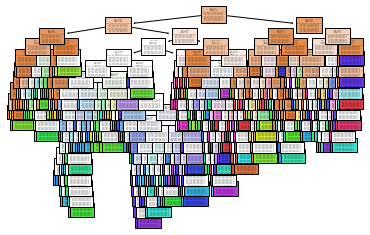

In [ ]:
plot_tree(df,filled=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred3=classifier.predict(X_val_and_test)

In [ ]:
y_pred3

array([1180.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        420.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,  890.,    0.,  900.,  970.,    0.,  890.,    0.,    0.,
          0.,    0., 1000.,    0.,    0.,    0.,    0.,    0.,  260.,
          0.,    0.,    0.,    0.,  680.,    0.,    0.,    0.,    0.,
          0.,  620.,    0.,  400.,  550.,  900.,    0.,  810.,  320.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  500.,
          0.,    0.,    0.,  360.,    0.,  590.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,  720.,    0.,
          0.,    0.,    0., 1000.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,  780.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,  260.,    0.,  840.,    0.,  800.,
          0.,    0.,  640.,  550.,    0.,    0.,    0., 1250.,    0.,
          0.,    0.,  900.,    0.,    0.,    0.,  420.,    0.,    0.,
          0.,    0.,

In [ ]:
Y_val_and_test

array([1140.,    0.,    0.,    0.,    0.,    0.,    0.,  500.,    0.,
        430.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,  930.,  475.,  920., 1020.,  250., 1170.,    0.,    0.,
          0.,    0., 1030.,    0.,    0.,    0.,    0.,    0.,  330.,
          0.,    0.,    0.,    0., 1100.,  130.,    0.,    0.,    0.,
          0.,  670.,  670.,  400.,  890.,  900.,    0.,  910.,  440.,
        290.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  550.,
        920.,    0.,  320.,  620.,    0.,  520.,    0.,    0.,    0.,
        500.,    0.,    0.,  280.,    0.,    0.,    0., 1030.,    0.,
          0.,    0.,    0.,  870.,    0.,  390.,    0.,    0.,    0.,
          0.,    0.,    0.,  980.,  620.,    0.,    0.,  800.,    0.,
          0.,    0.,    0.,    0.,  400.,    0.,  790.,    0.,  840.,
        200.,    0.,  780.,  400.,    0.,    0.,    0., 1280.,    0.,
          0.,  590.,  900.,    0.,    0.,    0.,  620.,  400.,  100.,
          0.,    0.,

In [ ]:
cmr=confusion_matrix(Y_val_and_test,y_pred3)

In [ ]:
cmr

array([[536,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0]])

In [ ]:
accuracy_score(Y_val_and_test,y_pred3)

0.6

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred4=classifier.predict(X_val_and_test)


In [ ]:
y_pred4

array([ 800.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,  800.,    0.,  510.,  760.,    0.,  890.,    0.,    0.,
          0.,    0.,  720.,    0.,    0.,    0.,    0.,    0.,  260.,
          0.,    0.,    0.,    0.,  910.,    0.,    0.,    0.,    0.,
          0.,  470.,    0.,    0., 1000.,    0.,    0.,  600.,  600.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  450.,
          0.,    0.,  440.,  300.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,  150.,    0.,    0.,    0.,  720.,    0.,
        350.,    0.,    0.,  790.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,  540.,    0.,    0.,    0.,  800.,    0.,
          0.,    0.,    0.,    0.,  380.,    0.,  780.,    0.,  550.,
          0.,    0.,  840.,    0.,    0.,    0.,    0.,  870.,    0.,
          0.,  140.,  620.,    0.,    0.,    0.,  620.,    0.,    0.,
        600.,    0.,

In [ ]:
Y_val_and_test

array([1140.,    0.,    0.,    0.,    0.,    0.,    0.,  500.,    0.,
        430.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,  930.,  475.,  920., 1020.,  250., 1170.,    0.,    0.,
          0.,    0., 1030.,    0.,    0.,    0.,    0.,    0.,  330.,
          0.,    0.,    0.,    0., 1100.,  130.,    0.,    0.,    0.,
          0.,  670.,  670.,  400.,  890.,  900.,    0.,  910.,  440.,
        290.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  550.,
        920.,    0.,  320.,  620.,    0.,  520.,    0.,    0.,    0.,
        500.,    0.,    0.,  280.,    0.,    0.,    0., 1030.,    0.,
          0.,    0.,    0.,  870.,    0.,  390.,    0.,    0.,    0.,
          0.,    0.,    0.,  980.,  620.,    0.,    0.,  800.,    0.,
          0.,    0.,    0.,    0.,  400.,    0.,  790.,    0.,  840.,
        200.,    0.,  780.,  400.,    0.,    0.,    0., 1280.,    0.,
          0.,  590.,  900.,    0.,    0.,    0.,  620.,  400.,  100.,
          0.,    0.,

In [ ]:
cmk=confusion_matrix(Y_val_and_test,y_pred4)
cmk

array([[528,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [ ]:
accuracy_score(Y_val_and_test,y_pred4)

0.5804347826086956

In [ ]:
error=[]
for i in range(1,60):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,Y_train)
  Ypred_i=knn.predict(X_val_and_test)
  error.append(np.mean(Ypred_i !=Y_val_and_test))

Text(0, 0.5, 'Mean Error')

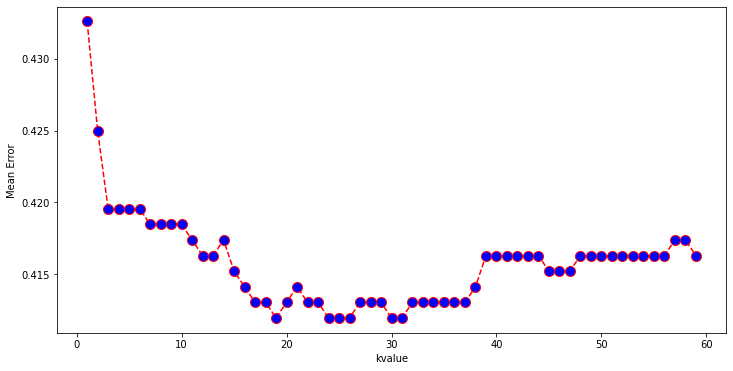

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,60),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.xlabel('kvalue')
plt.ylabel('Mean Error')